# 03_KNN notebook

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 10, 'font.style': 'normal', 'font.family':'serif'})

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

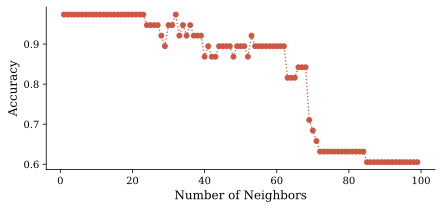

In [12]:
ACs = []
NN = range(1,100)
for nn in NN:
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    ACs.append(knn.score(X_test, y_test))
    
    
fig, ax1= plt.subplots(1, 1, figsize=(7,3))

ax1.set_xlabel('Number of Neighbors', fontsize=12)
ax1.set_ylabel(r'Accuracy', fontsize=12)

ax1.scatter(NN, ACs, color=(0.805, 0.34, 0.27), lw=0.05, label = '') 
ax1.plot(NN, ACs, color=(0.805, 0.34, 0.27), lw=1.3, ls = ':' )

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

# 04_Evaluation and Model Selection notebook

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y,  train_size=0.8,  test_size=0.2,  random_state=123,    stratify=y)

In [7]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

pred_y = tree.predict(test_X)

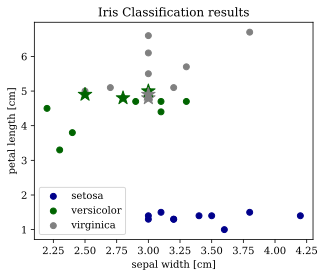

In [9]:
attr_A = 1
attr_B = 2

incorrect_idx = np.where(pred_y != test_y)[0]

plt.figure(figsize=(5,4))

colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, attr_A], test_X[idx, attr_B], color=color, label=iris.target_names[n])
    
idxc = test_y[incorrect_idx]
color=[]
for n in range(len(idxc)):
    color.append(colors[idxc[n]])

plt.scatter(test_X[incorrect_idx, attr_A], test_X[incorrect_idx, attr_B],color=color,s=200, marker='*')

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()